## 0

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

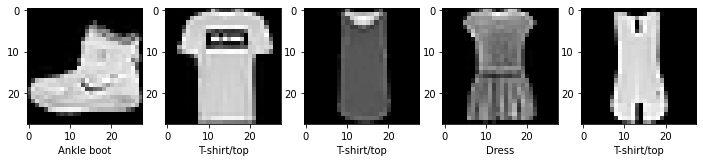

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize = (12, 4))

for i, ax in enumerate(axes):
    ax.imshow(train_images[i], cmap = "gray")
    ax.set_xlabel(class_names[train_labels[i]])

plt.show()

In [5]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

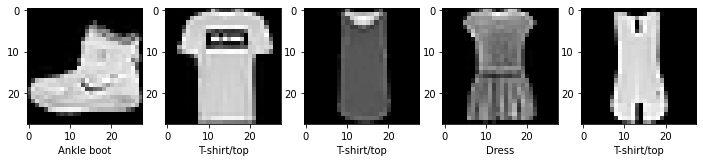

In [6]:
fig, axes = plt.subplots(1, 5, figsize = (12, 4))

for i, ax in enumerate(axes):
    ax.imshow(train_images_normalized[i], cmap = "gray")
    ax.set_xlabel(class_names[train_labels[i]])

plt.show()

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

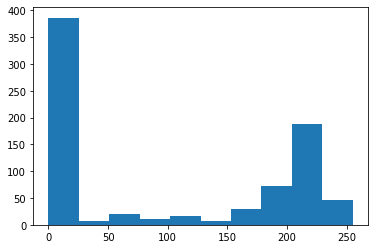

In [7]:
plt.hist(train_images[0].flatten())

(array([386.,   8.,  21.,  10.,  16.,   8.,  30.,  72., 187.,  46.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

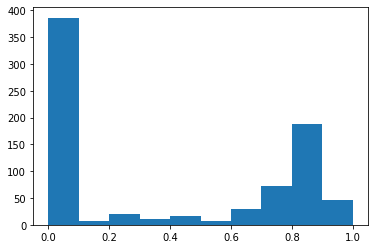

In [8]:
plt.hist(train_images_normalized[0].flatten())

In [9]:
np.bincount(train_labels)


array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [10]:
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

## 1

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

model_no_hidden = Sequential(name = "mlp_0_hidden")
model_no_hidden.add(Flatten(input_shape = (28, 28), name = "input_layer"))
model_no_hidden.add(Dense(256, name = "hidden1", activation = "relu"))
model_no_hidden.add(Dense(128, name = "hidden2", activation = "relu"))
model_no_hidden.add(Dense(10, name = "output", activation = "softmax"))

model_no_hidden.compile(loss = "sparse_categorical_crossentropy", optimizer = "adamax", metrics = ["accuracy"])

In [15]:
model_no_hidden.summary()

Model: "mlp_0_hidden"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_no_hidden.fit(train_images, train_labels, validation_split = 1/6, epochs = 20, verbose = 1)

Epoch 1/20


InvalidArgumentError: Cannot assign a device for operation mlp_0_hidden/hidden1/MatMul/ReadVariableOp: Could not satisfy explicit device specification '' because the node {{colocation_node mlp_0_hidden/hidden1/MatMul/ReadVariableOp}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
ResourceApplyAdaMax: CPU 
ReadVariableOp: GPU CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  mlp_0_hidden_hidden1_matmul_readvariableop_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adamax_adamax_update_resourceapplyadamax_m (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adamax_adamax_update_resourceapplyadamax_v (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  mlp_0_hidden/hidden1/MatMul/ReadVariableOp (ReadVariableOp) 
  Adamax/Adamax/update/ResourceApplyAdaMax (ResourceApplyAdaMax) /job:localhost/replica:0/task:0/device:GPU:0

	 [[{{node mlp_0_hidden/hidden1/MatMul/ReadVariableOp}}]] [Op:__inference_train_function_1321]

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_no_hidden.predict(test_images)
y_pred = np.argmax(y_pred, axis = 1)

2022-04-26 13:40:17.285569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1000
           1       0.98      0.94      0.96      1000
           2       0.77      0.69      0.73      1000
           3       0.80      0.88      0.84      1000
           4       0.67      0.85      0.75      1000
           5       0.94      0.94      0.94      1000
           6       0.68      0.48      0.56      1000
           7       0.91      0.93      0.92      1000
           8       0.93      0.96      0.94      1000
           9       0.95      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



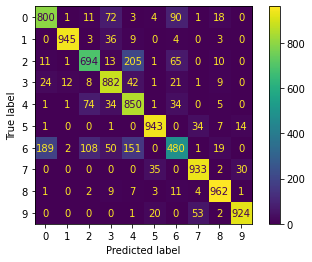

In [90]:
print(classification_report(test_labels, y_pred))
cm = confusion_matrix(test_labels, y_pred)
ConfusionMatrixDisplay(cm).plot()